根据A点的每天各污染物浓度情况，预测未来三天的各空气污染物浓度

In [73]:
import pandas as pd
import numpy as np
import sys
sys.path.append("/home/yuxk/mycode/MathModelng/Weather Forecast/")

data_path = "./附件1 监测点A空气质量预报基础数据.xlsx"
data = pd.read_excel(data_path, sheet_name=1)
data.dropna(inplace=True)
data.to_csv("./clear_data_a_h.csv", index=False)

划分数据集

In [17]:
import pandas as pd

data = pd.read_csv("./clear_data_a.csv", index_col=False)
pos = int(len(data) * 0.8)
data.iloc[:pos, :].to_csv("./train_data.csv", index=False)
data.iloc[pos:,:].to_csv("./test_data.csv", index=False)

构建LSTM模型用于预测

In [1]:
import torch
import torch.utils.data as data
import pandas as pd
from tqdm import tqdm

class AirConditionModel(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(AirConditionModel, self).__init__()
        self.lstm = torch.nn.LSTM(input_size=input_size, hidden_size=4*input_size, num_layers=5, batch_first=True, dropout=0.2)
        self.fc = torch.nn.Linear(4*input_size, output_size)
        # self.h0 = torch.zeros(5, 16, 4*input_size).requires_grad_().cuda()
        # self.c0 = torch.zeros(5, 16, 4*input_size).requires_grad_().cuda()
        
    def forward(self, x):
        out, _= self.lstm(x)
        out = self.fc(out[:,-1,:])
        return out
    
class AirData(data.Dataset):
    def __init__(self, seq, data_path=""):
        super(AirData, self).__init__()
        self.seq = seq
        self.path = data_path
        self.data = self.data_process()
    
    def data_process(self):
        data = pd.read_csv(self.path, index_col=False)
        data_air = data.iloc[:, 2:]
        return data_air.values
    
    def __len__(self):
        return len(self.data) - self.seq
    
    def __getitem__(self, index):
        x = self.data[index:index+self.seq]
        labels = self.data[index+1+self.seq, 2]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32)

device = torch.device("cuda:0")
model = AirConditionModel(input_size=11, output_size=1).to(device)
mse = torch.nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.0)
# schedule = torch.optim.lr_scheduler.LinearLR(optim, start_factor=1, end_factor=0.01, total_iters=300)
dataset = AirData(seq=200, data_path="./data_h.csv")
dataloder = data.DataLoader(dataset, batch_size=16, shuffle=False, drop_last=True)
for epoch in range(300):
    total = []
    for i, (input, labels) in enumerate(dataloder):
        input, labels = input.to(device), labels.to(device)
        optim.zero_grad()
        out = model(input)
        print(out.shape)
        loss = mse(out, labels)
        total.append(loss)
        loss.backward()
        optim.step()
    # schedule.step()
    # print(schedule.get_lr())
    print("epoch: {}, loss: {}".format(epoch, sum(total) / len(total)))
torch.save(model, "./aircondition.pth")
        

torch.Size([16, 1])


/home/yuxk/.conda/envs/pytorch/lib/python3.8/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])


KeyboardInterrupt: 

100%|██████████| 9/9 [00:00<00:00, 1777.08it/s]

[array([ 7.5744586, 34.47128  , 45.34134  , 24.764717 , 99.60682  ,
        0.6593025], dtype=float32), array([ 7.5744586, 34.47128  , 45.34134  , 24.764717 , 99.60682  ,
        0.6593025], dtype=float32), array([ 7.5744586, 34.47128  , 45.34134  , 24.764717 , 99.60682  ,
        0.6593025], dtype=float32), array([ 7.5744586, 34.47128  , 45.34134  , 24.764717 , 99.60682  ,
        0.6593025], dtype=float32), array([ 7.5744586, 34.47128  , 45.34134  , 24.764717 , 99.60682  ,
        0.6593025], dtype=float32), array([ 7.5744586, 34.47128  , 45.34134  , 24.764717 , 99.60682  ,
        0.6593025], dtype=float32), array([ 7.5744586, 34.47128  , 45.34134  , 24.764717 , 99.60682  ,
        0.6593025], dtype=float32), array([ 7.5744586, 34.47128  , 45.34134  , 24.764717 , 99.60682  ,
        0.6593025], dtype=float32), array([ 7.5744586, 34.47128  , 45.34134  , 24.764717 , 99.60682  ,
        0.6593025], dtype=float32), array([ 7.5744586, 34.47128  , 45.34134  , 24.764717 , 99.60682  ,
     

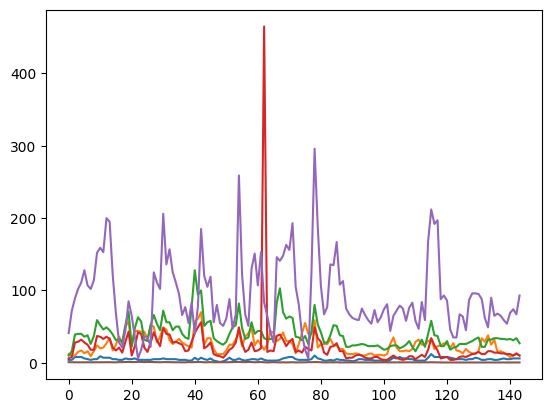

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize(y_pre, y_true):
    # y_pre = np.array(y_pre ,dtype=np.int32)
    print(y_pre)
    y_pre, y_true = pd.DataFrame(np.array(y_pre ,dtype=np.float32), columns=["SO2", "NO2", "PM10", "PM2.5", "O3", "CO"]), pd.DataFrame(np.array(y_true, dtype=np.float32),columns=["SO2", "NO2", "PM10", "PM2.5", "O3", "CO"])
    y_pre.to_csv("./pred.csv")
    y_true.to_csv("./true.csv")
    y = list(range(len(y_pre)))
    plt.plot(y, y_true)
    plt.show()
    
class AirData_test(data.Dataset):
    def __init__(self, seq, data_path=""):
        super(AirData_test, self).__init__()
        self.seq = seq
        self.path = data_path
        self.data = self.data_process()
    
    def data_process(self):
        data = pd.read_csv(self.path, index_col=False)
        data_air = data.iloc[:, 2:8]
        return data_air.values
    
    def __len__(self):
        return len(self.data) - self.seq - 1
    
    def __getitem__(self, index):
        x = self.data[index:index+self.seq]
        labels = self.data[index+1+self.seq]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32)


test_model = torch.load("./aircondition.pth", map_location=device)
test_dataset = AirData_test(7, "./test_data.csv")
test_dataloder = data.DataLoader(test_dataset, batch_size=16, shuffle=False, drop_last=True)
y_pre = []
y_true = []
for (input, labels) in tqdm(test_dataloder):
    model.eval()
    with torch.no_grad():
        input = input.to(device)
        out = model(input)
        out = out.cpu().numpy()
        labels = labels.numpy()
        if len(y_pre) == 0:
            y_pre = list(out)
        else:
            y_pre += list(out)
        if len(y_true) == 0:
            y_true = list(labels)
        else:
            y_true += list(labels)
visualize(y_pre, y_true)

In [48]:
t = torch.rand((6,6,6))
print(t)
t[:,-1,:]

tensor([[[7.2564e-01, 3.8619e-02, 5.9762e-01, 3.7609e-01, 4.3454e-01,
          3.7694e-01],
         [1.0647e-01, 1.2163e-01, 1.7074e-01, 8.0903e-01, 4.2889e-01,
          6.4601e-01],
         [4.2824e-01, 2.0829e-01, 9.0429e-01, 3.8873e-01, 8.6710e-01,
          5.7895e-01],
         [7.2802e-01, 4.7124e-01, 3.4592e-01, 7.4703e-01, 7.2714e-01,
          1.8531e-01],
         [8.6261e-01, 5.6272e-01, 3.6380e-01, 5.1050e-01, 7.9128e-01,
          1.2469e-02],
         [6.1317e-01, 4.2815e-01, 3.1958e-01, 4.1139e-01, 5.0073e-01,
          9.2082e-01]],

        [[8.5150e-01, 9.9377e-01, 8.9066e-01, 5.7517e-01, 8.3852e-01,
          5.4699e-01],
         [1.4441e-01, 2.3963e-01, 3.7775e-02, 7.7704e-02, 6.7720e-02,
          7.7936e-01],
         [3.4246e-01, 1.3254e-01, 7.7081e-01, 2.3131e-01, 8.2811e-01,
          7.5767e-01],
         [1.0716e-01, 7.5947e-01, 3.7133e-01, 8.4103e-01, 5.3285e-01,
          5.3299e-01],
         [7.9889e-01, 9.2034e-01, 6.7213e-01, 5.9907e-01, 5.7292e-01

tensor([[0.6132, 0.4281, 0.3196, 0.4114, 0.5007, 0.9208],
        [0.3653, 0.4684, 0.9014, 0.3621, 0.0722, 0.1549],
        [0.4700, 0.9105, 0.1019, 0.7826, 0.0263, 0.2545],
        [0.8972, 0.0319, 0.1352, 0.8562, 0.5236, 0.9003],
        [0.0269, 0.7911, 0.1965, 0.2928, 0.8187, 0.6057],
        [0.1614, 0.5774, 0.7587, 0.1332, 0.4174, 0.6062]])